In [14]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptbl

In [15]:
def SOR(a,x,B,N,E,W = 1.0):
    
    # Copying input arguments into local arguments to avoid data Over-writing
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    w = copy.copy(W)

    print("\n***** Succesive Over Relaxation *****")

    # List to hold column titles for Making table
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('x'+str(i+1))
    
    # List to hold data which is to be displayed in table
    outputlist=[]
    
    # List to hold data which is to be used to plot graph i.e. iteration count and corresponding accuracy
    accuracy = []
    
    condition = True
    count = 0

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            for j in range (i):
                X[j] = X_new[j]
            
            tmp = 0
            n = len(A)
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (1-w)*X_prev[i] + w*((b[i] - tmp)/A[i][i])
            
        temp = []
        temp.append(count+1)
        # Displaying iteration data and adding it to a local list so that local list can then 
        print(f'Iteration = {count}',end="\t")
        for i in range(n):
            print(f'  x{i+1} = {X_new[i]:.6f}', end = "\t")
            temp.append(X_new[i])
        print()
        outputlist.append(temp)         # Adding data to outputlist (for making table)

        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i]))
        
        accuracy.append([count+1,accuracyReached])          # Adding data to accuracy list (for plotting graphs)
        
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True
    
    # Making Table and pushing data in it
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)

    # Printing Result
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]:.6f}', end = "\t")
    print()

    return accuracy, table

In [16]:
n = 3
A = np.array([[-10.,-8.,0.],
            [-8.,10.,-1.,],
            [0.,-1.,10.]
            ])

b = np.array([-6.,9.,28.])

# A = np.array([[3.,-1.,1.],
#             [-1.,3.,-1.],
#             [1.,-1.,3]
#             ])

# b = np.array([
#     [-1.],
#     [7.],
#     [-7.]
# ])

A = np.array([[10.,-1.,0.],
            [-1.,10.,-2.],
            [0.,-2.,10.]
            ])
            
b = np.array([
    [9.],
    [7.],
    [6.]
])

# initial Guesses
X = np.array([0.,0.,0.])

# Reading tolerable error
e = 0.0001


# Reading relaxation factor
w = 7/10

In [17]:
sor, table = SOR(A,X,b,n,e,w)
sor_count = []
sor_accuracy = []
for i in sor:
    sor_count.append(i[0])
    sor_accuracy.append(i[1])


***** Succesive Over Relaxation *****
Iteration = 0	  x1 = 0.630000	  x2 = 0.534100	  x3 = 0.494774	
Iteration = 1	  x1 = 0.856387	  x2 = 0.779445	  x3 = 0.677555	
Iteration = 2	  x1 = 0.941477	  x2 = 0.884595	  x3 = 0.747110	
Iteration = 3	  x1 = 0.974365	  x2 = 0.928179	  x3 = 0.774078	
Iteration = 4	  x1 = 0.987282	  x2 = 0.945934	  x3 = 0.784654	
Iteration = 5	  x1 = 0.992400	  x2 = 0.953100	  x3 = 0.788830	
Iteration = 6	  x1 = 0.994437	  x2 = 0.955977	  x3 = 0.790486	
Iteration = 7	  x1 = 0.995249	  x2 = 0.957129	  x3 = 0.791144	
Iteration = 8	  x1 = 0.995574	  x2 = 0.957589	  x3 = 0.791406	
Iteration = 9	  x1 = 0.995703	  x2 = 0.957773	  x3 = 0.791510	
Iteration = 10	  x1 = 0.995755	  x2 = 0.957846	  x3 = 0.791551	

Solution: Iteration = 11
x1 = 0.995755	x2 = 0.957846	x3 = 0.791551	


In [18]:
print(table)

+-----------+--------------------+--------------------+--------------------+
| Iteration |         x1         |         x2         |         x3         |
+-----------+--------------------+--------------------+--------------------+
|     1     |        0.63        |       0.5341       |      0.494774      |
|     2     | 0.8563870000000001 | 0.7794454500000001 | 0.6775545629999999 |
|     3     | 0.9414772815000001 |   0.884594683525   |  0.7471096245935   |
|     4     |  0.97436481229675  | 0.9281792893613625 | 0.7740779878886408 |
|     5     | 0.9872819939443205 | 0.945934444688921  | 0.7846542186230412 |
|     6     | 0.9924000093115206 | 0.9530999246657086 | 0.7888302550401115 |
|     7     | 0.9944369975200559 | 0.955976802931732  | 0.790485828922476  |
|     8     | 0.995249475461238  | 0.957128520210953  | 0.7911437415062761 |
|     9     | 0.9955738390531381 | 0.9575888486078843 | 0.7914055612569866 |
|     10    | 0.9957033711184933 | 0.9577726691366379 | 0.7915098420562252 |

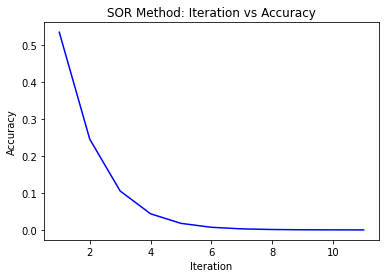

In [19]:
plt.title("SOR Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(sor_count,sor_accuracy,color = 'blue')
plt.show()